<a href="https://colab.research.google.com/github/vamshi-nayak/SKMLI181_Tasks/blob/main/phase1_A(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1000, Loss: 0.019224946232261432
Epoch 2000, Loss: 0.013330892789164937
Epoch 3000, Loss: 0.012306687695269394
Epoch 4000, Loss: 0.011844400818865758
Epoch 5000, Loss: 0.011559477063789727
Epoch 6000, Loss: 0.01134879963990718
Epoch 7000, Loss: 0.011175691370072257
Epoch 8000, Loss: 0.01131780169855971
Epoch 9000, Loss: 0.011300045630116662
Epoch 10000, Loss: 0.011285298478077365
Accuracy: 100.0%


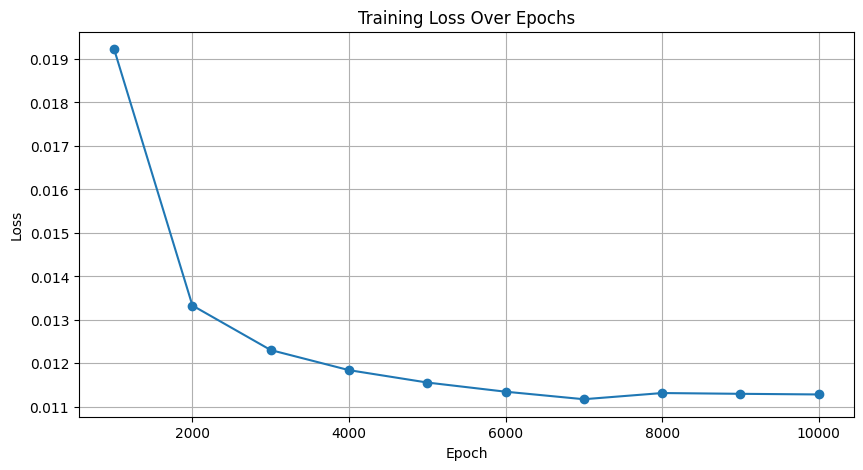

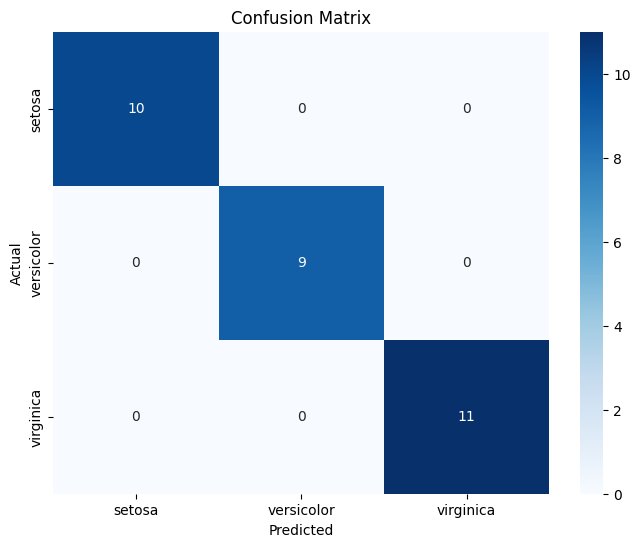

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden_size = 5
output_size = Y_train.shape[1]

# Weights
W1 = np.random.uniform(size=(input_size, hidden_size))
W2 = np.random.uniform(size=(hidden_size, output_size))

# Biases
B1 = np.random.uniform(size=(1, hidden_size))
B2 = np.random.uniform(size=(1, output_size))

def forward(X):
    global Z1, A1, Z2, A2
    Z1 = np.dot(X, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)
    return A2

def backward(X, Y, output):
    global W1, W2, B1, B2
    error = Y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(A1)

    W2 += A1.T.dot(d_output) * learning_rate
    B2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    B1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

learning_rate = 0.01
epochs = 10000
losses = []

for epoch in range(epochs):
    output = forward(X_train)
    backward(X_train, Y_train, output)
    if (epoch+1) % 1000 == 0:
        loss = np.mean(np.square(Y_train - output))
        losses.append(loss)
        print(f"Epoch {epoch+1}, Loss: {loss}")

def predict(X):
    output = forward(X)
    return np.argmax(output, axis=1)

predictions = predict(X_test)
actual = np.argmax(Y_test, axis=1)

accuracy = np.mean(predictions == actual)
print(f"Accuracy: {accuracy * 100}%")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1000, epochs+1, 1000), losses, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(actual, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()